In [81]:
import numpy as np
import pandas as pd

In [82]:
import chardet

with open('spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv('spam.csv', encoding=encoding)

In [83]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [84]:
df.shape

(5572, 5)

In [85]:
# 1.Data Cleaning
# 2. EDA
# 3.text preprocessing
# 4.Model building
# 5.Evaluation
# 6.improvements
# 7.Website
# 9.Deploy on Heroku

***DATA CLEANING***

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [87]:
# drop last 3 columns

In [88]:
df.drop(columns = ['Unnamed: 2',	'Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [89]:
df.sample(5)

,v1,v2
4018,spam,U've been selected to stay in 1 of 250 top Bri...
3102,ham,"U so lousy, run already come back then half de..."
2313,ham,So what do you guys do.
3416,ham,But i haf enuff space got like 4 mb...
3367,ham,"Hey elaine, is today's meeting still on?"


In [90]:
# renaming the columns
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [91]:
df.sample(5)

,target,text
1172,ham,Happy new years melody!
3244,ham,"Its ok, if anybody asks abt me, u tel them..:-P"
201,ham,Hello darlin ive finished college now so txt m...
786,ham,It does it on its own. Most of the time it fix...
4690,ham,Surly ill give it to you:-) while coming to re...


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [93]:
df['target'] = encoder.fit_transform(df['target'])

In [94]:
df.sample(5)

,target,text
953,0,Also remember to get dobby's bowl from your car
3772,0,I came hostel. I m going to sleep. Plz call me...
937,0,K:)k.are you in college?
1074,0,Aight ill get on fb in a couple minutes
1693,0,Was gr8 to see that message. So when r u leavi...


In [95]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [96]:
df.duplicated().sum()

403

In [97]:
df = df.drop_duplicates(keep = 'first')

In [98]:
df.shape

(5169, 2)

***EDA***

In [99]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

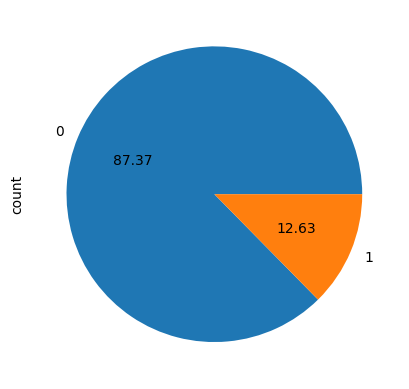

In [100]:
df['target'].value_counts().plot(kind = 'pie',autopct = "%.2f")

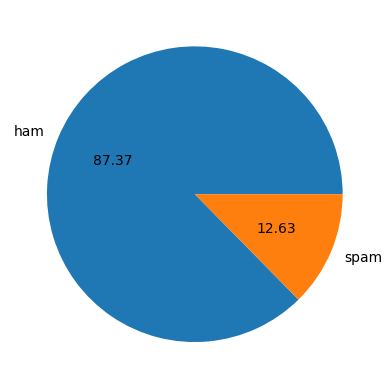

In [101]:
plt.pie(df['target'].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")
plt.show()

In [102]:
!pip install nltk

DEPRECATION: Loading egg at c:\users\nisha\onedrive\desktop\abhishek files\python 311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import nltk

In [104]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
df['num_characters'] = df['text'].apply(len)

In [106]:
df.sample(2)

,target,text,num_characters
451,0,Thanks for this hope you had a good day today,45
2626,0,Unni thank you dear for the recharge..Rakhesh,45


In [107]:
# fetch the number of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [108]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [109]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [110]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [111]:
df[['num_characters','num_words','num_words']].describe()

,num_characters,num_words,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [112]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [114]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

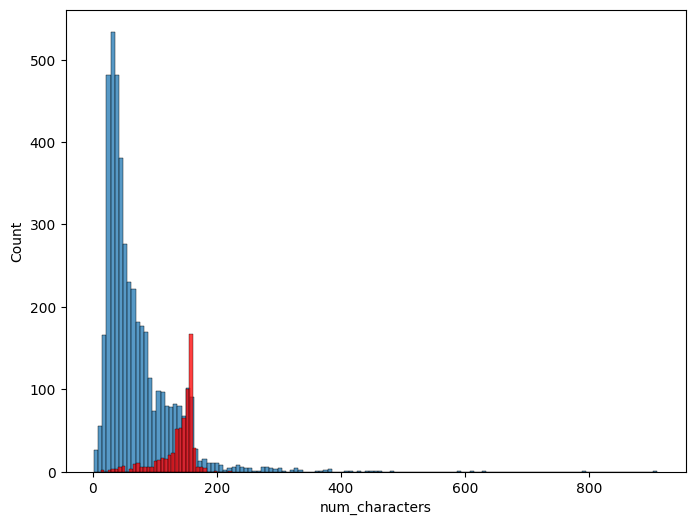

In [115]:
plt.figure(figsize = (8,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

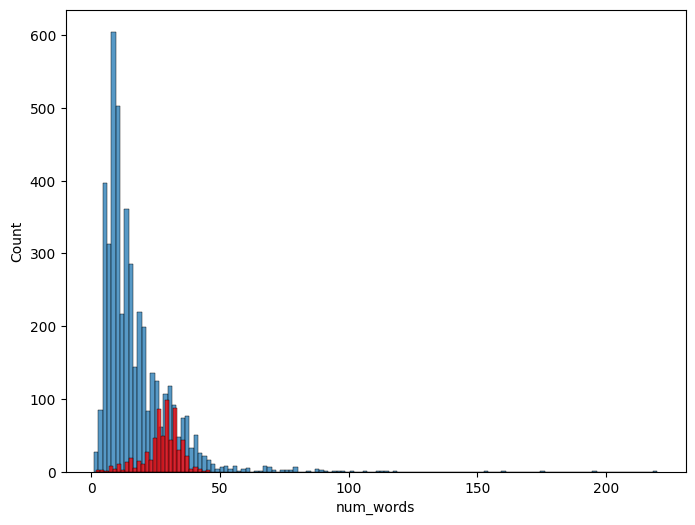

In [116]:
plt.figure(figsize = (8,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

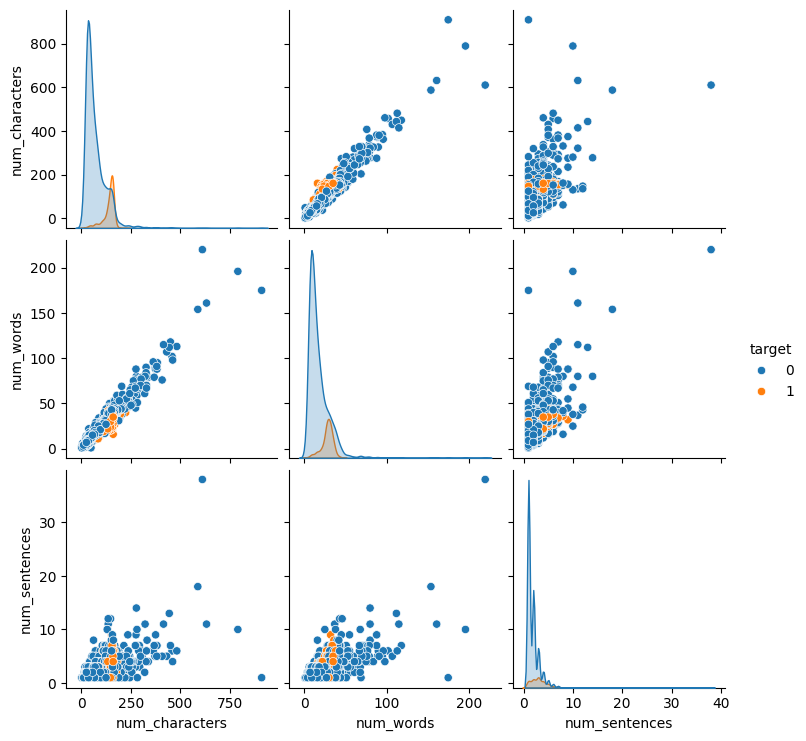

In [117]:
sns.pairplot(df,hue = 'target')


<Axes: >

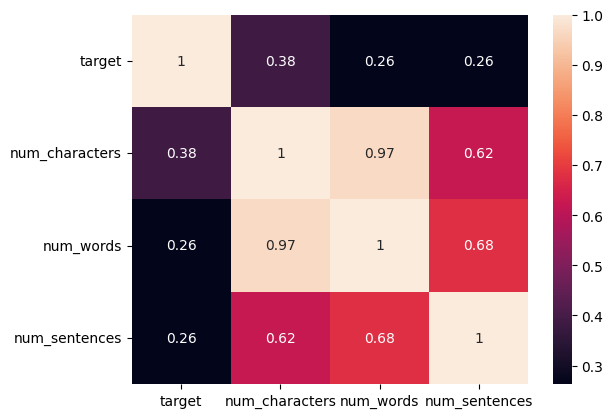

In [118]:
sns.heatmap(df.drop(['text'],axis = 1).corr(),annot = True)

***DATA PREPROCESSING***
1. Lower Casing
2. Tokenization
3. Removal of Special Characters
4. Removal of stop words and punctuation
5. Stemming

In [119]:
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [120]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    
            
    return " ".join(y)

In [121]:
transform_text('Hi HOW ARE YOU Nishaad , go for a walk. I am Walking')

'hi nishaad go walk walk'

In [122]:
df['transformed_text'] = df['text'].apply(transform_text)

In [123]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [124]:
# generating word cloud
!pip install wordcloud

DEPRECATION: Loading egg at c:\users\nisha\onedrive\desktop\abhishek files\python 311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [126]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

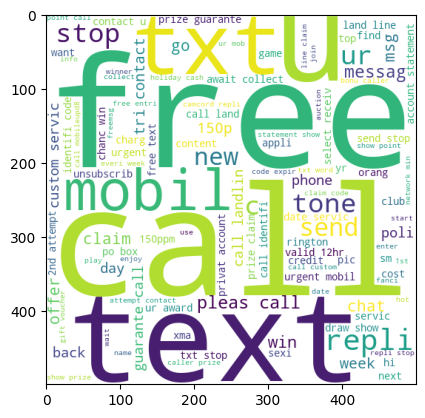

In [127]:
plt.figure(figure = (15,6))
plt.imshow(spam_wc)
plt.show()

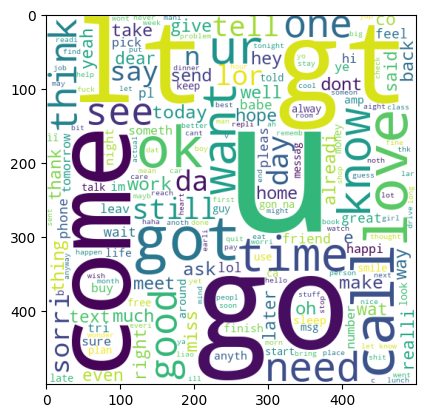

In [128]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figure = (15,6))
plt.imshow(spam_wc)
plt.show()

In [129]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [130]:
len(spam_corpus)

9939

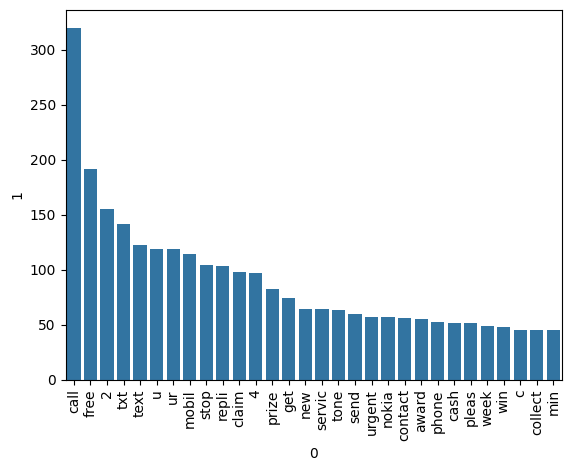

In [131]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

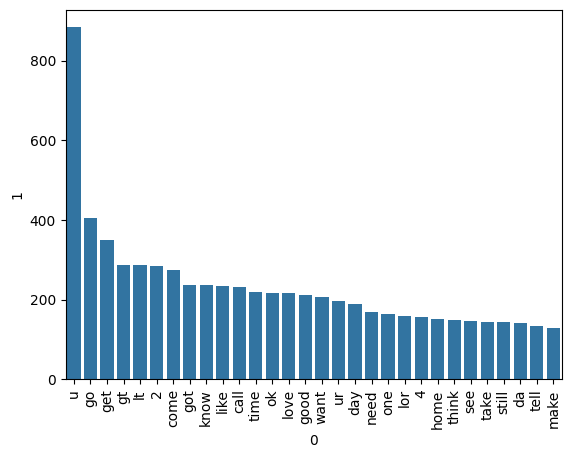

In [132]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
        
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

***Model Building***

In [133]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [80]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [134]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [135]:
X.shape

(5169, 3000)

In [136]:
Y = df['target'].values

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [139]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [142]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [143]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [144]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [145]:
# tfidf --> MNB

In [146]:
!pip install xgboost

DEPRECATION: Loading egg at c:\users\nisha\onedrive\desktop\abhishek files\python 311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [148]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc =  LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [149]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [150]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    return accuracy,precision

In [151]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [78]:
len(accuracy_scores)

0

In [152]:
performance_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores
})

In [153]:
temp = performance_df.sort_values('Precision',ascending = False)

In [196]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [159]:
!pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------- ------------------------------ 61.4/250.9 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 163.8/250.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.9 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\nisha\onedrive\desktop\abhishek files\python 311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
temp.to_excel('performance.xlsx', index=False)